# Linear Regression
Linear Regression models are models which predict a continuous label. The goal is to produce a model that represents the ‘best fit’ to some observed data, according to an evaluation criterion we choose.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from numpy.linalg import inv
from numpy.random import normal as rnorm
from statsmodels.stats.outliers_influence import OLSInfluence

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.titlesize'] = 20
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['legend.fontsize'] = 14

## Data

In [2]:
file = 'data/kaggle_house_price.csv'
df = pd.read_csv(file)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df[['SalePrice', 'OverallQual']].describe()

,SalePrice,OverallQual
count,1460.000000,1460.000000
mean,180921.195890,6.099315
std,79442.502883,1.382997
min,34900.000000,1.000000
25%,129975.000000,5.000000
50%,163000.000000,6.000000
75%,214000.000000,7.000000
max,755000.000000,10.000000


### Correlation Coefficient
The Pearson correlation coefficient is also an indicator of the extent and strength of the linear relationship between the two variables

In [4]:
df[["SalePrice", "OverallQual"]].corr()

,SalePrice,OverallQual
SalePrice,1.000000,0.790982
OverallQual,0.790982,1.000000


## Estimating the Coefficients

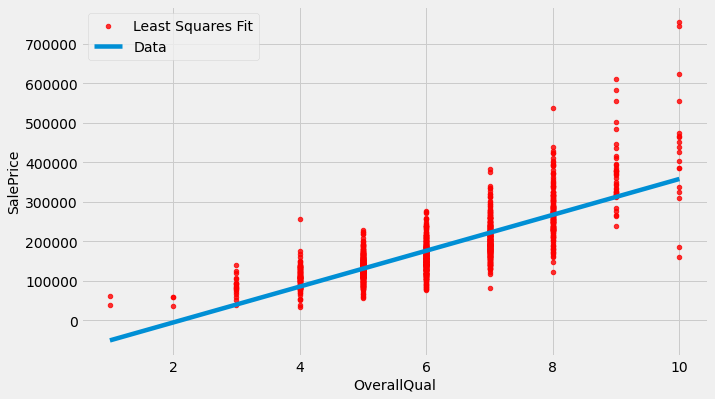

In [5]:
ax = sns.regplot(data=df, x='OverallQual', y='SalePrice', ci=None, scatter_kws={'color':'r', 's':20})
ax.legend(['Least Squares Fit', 'Data'])

In [6]:
X = df['OverallQual'].values.reshape(-1, 1)
y = df['SalePrice'].values


reg = LinearRegression().fit(X, y)
print(reg.intercept_)
print(reg.coef_)

-96206.07951476038
[45435.8025931]


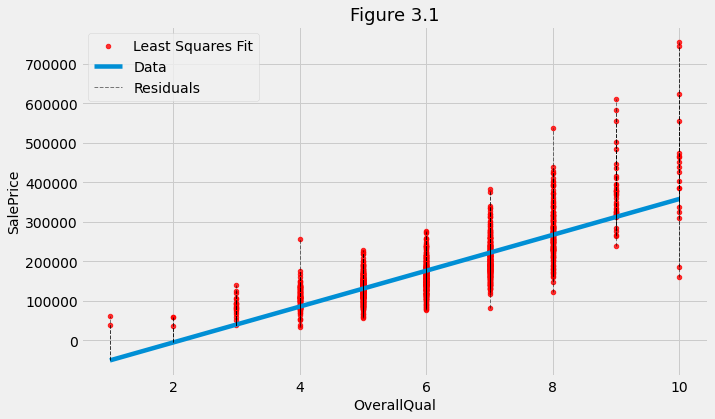

In [7]:
y_hat = reg.predict(X)

fig, ax = plt.subplots(1,1)
ax.set_title('Figure 3.1')

ax = sns.regplot(x=df.OverallQual, y=df.SalePrice, ax=ax, order=1, ci=None, scatter_kws={'color':'r', 's':20})
ax.vlines(X, np.minimum(y, y_hat), np.maximum(y, y_hat), linestyle='--', color='k', alpha=0.5, linewidth=1)
plt.legend(['Least Squares Fit', 'Data', 'Residuals'])

[30433.34855091]
[-96206.07951476  45435.8025931 ]


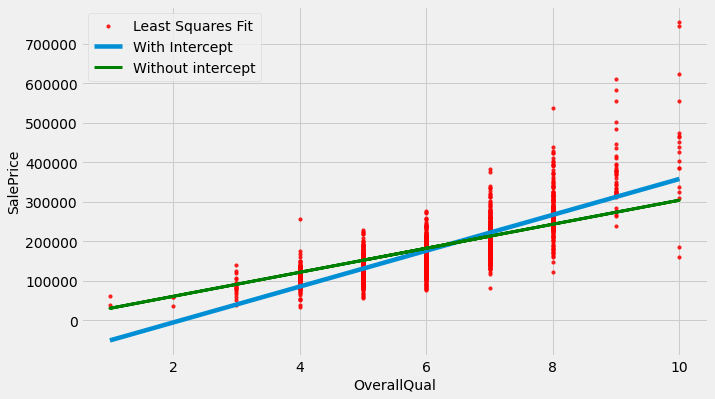

In [8]:
# Compute OLS coefficient with matrix algebra
beta = inv(X.T @ X) @ X.T @ y
print(beta)

ax = sns.regplot(data=df, x='OverallQual', y='SalePrice', order=1, ci=None, scatter_kws={'color':'r', 's':10})
ax.plot(X, beta*X, color='g')
ax.legend(['Least Squares Fit', 'With Intercept', 'Without intercept'])

# Compute beta OLS with intercept
one = np.ones(np.shape(X))
X1 = np.concatenate([one, X], axis=1)
beta_OLS = inv(X1.T @ X1) @ X1.T @ y
print(beta_OLS)

### Assessing the Accuracy of the Coefficient Estimates

In [9]:
est = sm.OLS.from_formula('SalePrice ~ OverallQual', df).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     2437.
Date:                Sun, 17 Jul 2022   Prob (F-statistic):          2.19e-313
Time:                        15:39:33   Log-Likelihood:                -17827.
No. Observations:                1460   AIC:                         3.566e+04
Df Residuals:                    1458   BIC:                         3.567e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -9.621e+04   5756.407    -16.713      0.000   -1.07e+05   -8.49e+04
OverallQual  4.544e+04    920.430     49.364      0.000    4.36e+04    4.72e+04
==============================================================================
Omnibus:                      591.594   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5872.098
Skew:                           1.607   Prob(JB):                         0.00
Kurtosis:                      12.284   Cond. No.                         29.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Interpretation of the Model Coefficient and the P-value:**
Coef is important for model interpretation. The fitted model implies that, when comparing two applicants whose `OverallQual` differ by one unit, the applicant with the higher `OverallQual` will, on average, have **45440** units higher `SalePrice`. This difference is statistically significant, because the p-value, shown under the column labeled P>|t|, is less than the significance value of **0.05**. This means that there is a strong evidence of a linear association between the variables `SalePrice` and `OverallQual`.

**Interpretation of the R-squared value:**
- R-squared: It signifies the **percentage variation in dependent that is explained by independent variables**. This statistic has a drawback, it increases with the number of predictors(dependent variables) increase.

- Adj. R-squared: This is the modified version of R-squared which is adjusted for the number of variables in the regression. It **increases only when an additional variable adds to the explanatory power to the regression.**

The other parameter to test the efficacy of the model is the R-squared value, which represents the percentage variation in the dependent variable `SalePrice` that is explained by the independent variable `OverallQual`. The higher the value, the better the explainability of the model, with the highest value being one. In our case, the R-squared value of **0.626** means that **62%** of the variation in the variable `SalePrice` is explained by the variable `OverallQual`.

In typical applications in biology, psychology, marketing, and other domains, we would expect only a very small proportion of the variance in the response to be explained by the predictor, and an R2 value well below 0.1 might be more realistic!
*[R-squared reference link](https://quantifyinghealth.com/r-squared-study/)*

**Interpretation of the F-Statistic:**
- Prob(F-Statistic): This tells **the overall significance of the regression.** This is to assess the significance level of all the variables together unlike the t-statistic that measures it for individual variables. The null hypothesis under this is “all the regression coefficients are equal to zero”. Prob(F-statistics) depicts the probability of null hypothesis being true. **As per the above results, probability is close to zero. This implies that overall the regressions is meaningful.**

*[F-Statistic reference link](https://quantifyinghealth.com/f-statistic-in-linear-regression/)*


## Linear Regression - Multivariate

In [10]:
model_lin = sm.OLS.from_formula("SalePrice ~ OverallQual", data=df)
result_lin = model_lin.fit()
result_lin.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-9.621e+04,5756.407,-16.713,0.000,-1.07e+05,-8.49e+04
OverallQual,4.544e+04,920.430,49.364,0.000,4.36e+04,4.72e+04


In [11]:
model_lin = sm.OLS.from_formula("SalePrice ~ GarageArea", data=df)
result_lin = model_lin.fit()
result_lin.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.136e+04,3949.003,18.070,0.000,6.36e+04,7.91e+04
GarageArea,231.6456,7.608,30.446,0.000,216.721,246.570


In [12]:
model_lin = sm.OLS.from_formula("SalePrice ~ OverallQual + GarageArea", data=df)
result_lin = model_lin.fit()
result_lin.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-9.067e+04,5400.290,-16.790,0.000,-1.01e+05,-8.01e+04
OverallQual,3.699e+04,1041.328,35.526,0.000,3.5e+04,3.9e+04
GarageArea,97.1547,6.736,14.424,0.000,83.942,110.368


In [13]:
result_lin.summary().tables[0]

Dep. Variable:,SalePrice,R-squared:,0.672
Model:,OLS,Adj. R-squared:,0.672
Method:,Least Squares,F-statistic:,1495.
Date:,"Sun, 17 Jul 2022",Prob (F-statistic):,0.00
Time:,15:39:33,Log-Likelihood:,-17729.
No. Observations:,1460,AIC:,3.546e+04
Df Residuals:,1457,BIC:,3.548e+04
Df Model:,2,,
Covariance Type:,nonrobust,,


**How do you check whether the model fit well the data with multiple regressors?**

First measure: `F-test`. The F-test tries to answer the question “Is There a Relationship Between the Response and Predictors?”

A rule of thumb is to reject H0 if **F > 10**

### Relaxing the Additive Assumption

In [14]:
est = sm.OLS.from_formula('SalePrice ~ OverallQual + GarageArea + OverallQual*GarageArea', df).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,3.461e+04,1.09e+04,3.176,0.002,1.32e+04,5.6e+04
OverallQual,1.493e+04,1960.584,7.614,0.000,1.11e+04,1.88e+04
GarageArea,-144.7520,19.643,-7.369,0.000,-183.283,-106.221
OverallQual:GarageArea,40.5526,3.114,13.021,0.000,34.443,46.662


### Heterogeneous Effects
We can do interactions with qualitative variables as well.

In [15]:
# Interaction between qualitative and quantative variables
est1 = sm.OLS.from_formula('SalePrice ~ OverallQual + Street', df).fit()
est2 = sm.OLS.from_formula('SalePrice ~ OverallQual + Street + Street*OverallQual', df).fit()

reg1 = est1.params
reg2 = est2.params

print('Regression 1 - without interaction term')
print(est1.summary().tables[1])
print('\nRegression 2 - with interaction term')
print(est2.summary().tables[1])

Regression 1 - without interaction term
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -8.951e+04   2.04e+04     -4.398      0.000   -1.29e+05   -4.96e+04
Street[T.Pave] -6841.8945   1.99e+04     -0.343      0.731   -4.59e+04    3.23e+04
OverallQual     4.545e+04    922.306     49.283      0.000    4.36e+04    4.73e+04

Regression 2 - with interaction term
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                    4.35e+04   1.09e+05      0.400      0.689    -1.7e+05    2.57e+05
Street[T.Pave]             -1.401e+05   1.09e+05     -1.287      0.198   -3.54e+05    7.35e+04
OverallQual                 1.794e+04   2.21e+04      0.811      0.418   -2.55e+04    6.13e+04
Street[T.Pave]:OverallQual  2.75